In [ ]:
import pandas as pd


df = pd.read_excel('/df.xlsx')
df.head()



,Year,Exp_Val,Exp_country,Ipm_Val,Imp_country
0,2013-14,39143.336575,U S A,51036.168659,China
1,2013-14,30521.563029,U A E,36404.613303,Saudi Arabia
2,2013-14,12732.369253,Hong Kong,29020.585641,U A E
3,2013-14,12510.724936,Singapore,22505.732787,U S A
4,2013-14,14824.830152,China,19311.452599,Switzerland


In [ ]:




# Group by year, the top 5 exporting countries for each year
top_exporters = df.groupby('Year').apply(lambda group: group.nlargest(5, 'Exp_Val')).reset_index(drop=True)
top_exporters = top_exporters.rename(columns={'Exp_Val': 'Export Value', 'Exp_country': 'Exporting Country'})

# Group by year, the top 5 importing countries for each year
top_importers = df.groupby('Year').apply(lambda group: group.nlargest(5, 'Ipm_Val')).reset_index(drop=True)
top_importers = top_importers.rename(columns={'Ipm_Val': 'Import Value', 'Imp_country': 'Importing Country'})

# Merge on Year
result_df = pd.merge(top_exporters, top_importers, on='Year')

# Display
print(result_df)


        Year  Export Value Exporting Country       Ipm_Val Imp_country  \
0    2013-14  39143.336575             U S A  51036.168659       China   
1    2013-14  39143.336575             U S A  51036.168659       China   
2    2013-14  39143.336575             U S A  51036.168659       China   
3    2013-14  39143.336575             U S A  51036.168659       China   
4    2013-14  39143.336575             U S A  51036.168659       China   
..       ...           ...               ...           ...         ...   
245  2022-23  12203.900000        Bangladesh  50240.100000       U S A   
246  2022-23  12203.900000        Bangladesh  50240.100000       U S A   
247  2022-23  12203.900000        Bangladesh  50240.100000       U S A   
248  2022-23  12203.900000        Bangladesh  50240.100000       U S A   
249  2022-23  12203.900000        Bangladesh  50240.100000       U S A   

          Exp_Val  Exp_country  Import Value Importing Country  
0    39143.336575        U S A  51036.168659  

<ipython-input-62-e1187d69af0f>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_importers = df.groupby('Year').apply(lambda group: group.nlargest(5, 'Ipm_Val')).reset_index(drop=True)


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

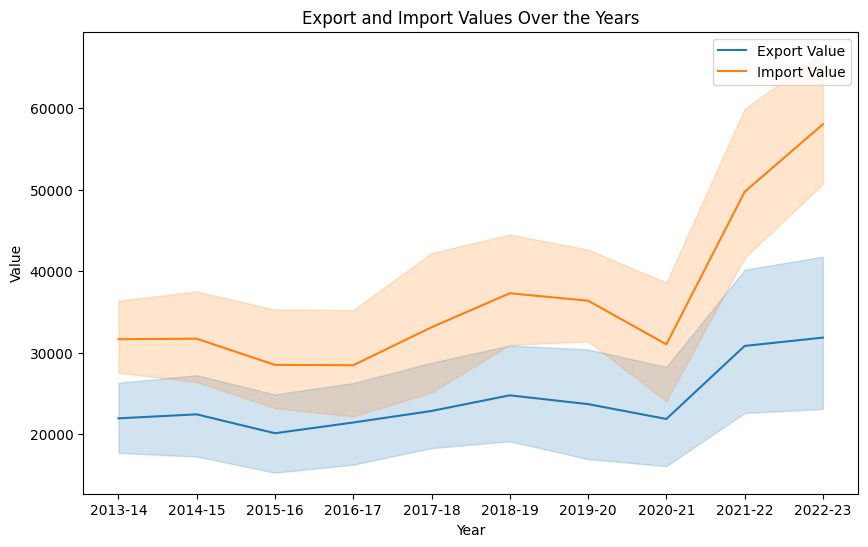

In [ ]:
# Assuming result_df is the DataFrame with my analysis results

# Visualization 1: Line Plot - Export and Import Values Over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Export Value', data=result_df, label='Export Value')
sns.lineplot(x='Year', y='Import Value', data=result_df, label='Import Value')
plt.title('Export and Import Values Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()



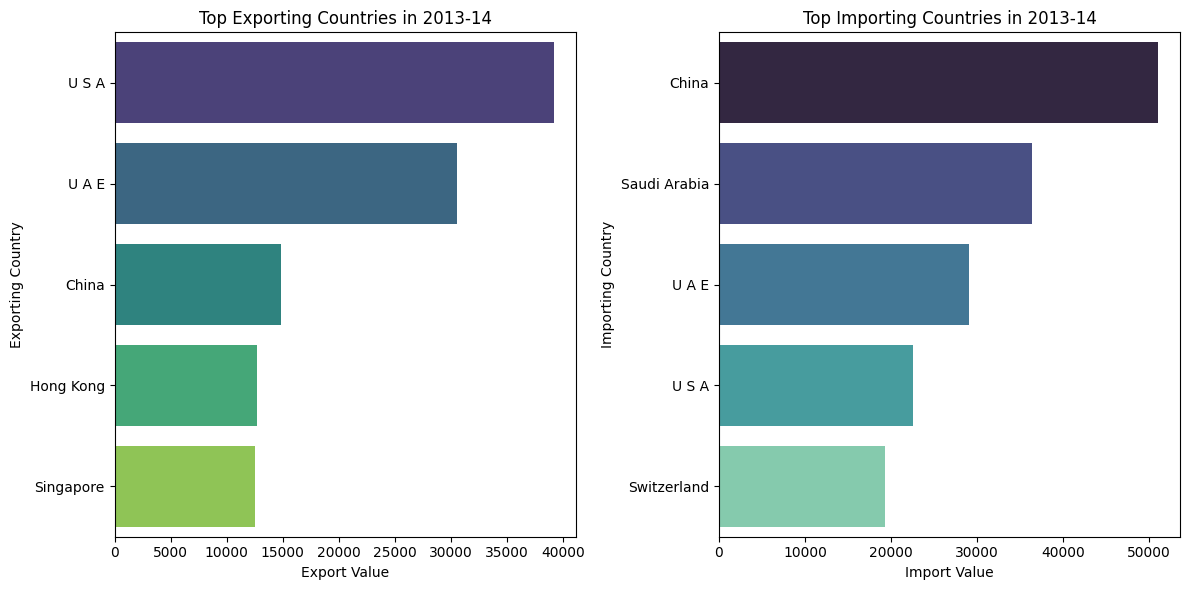

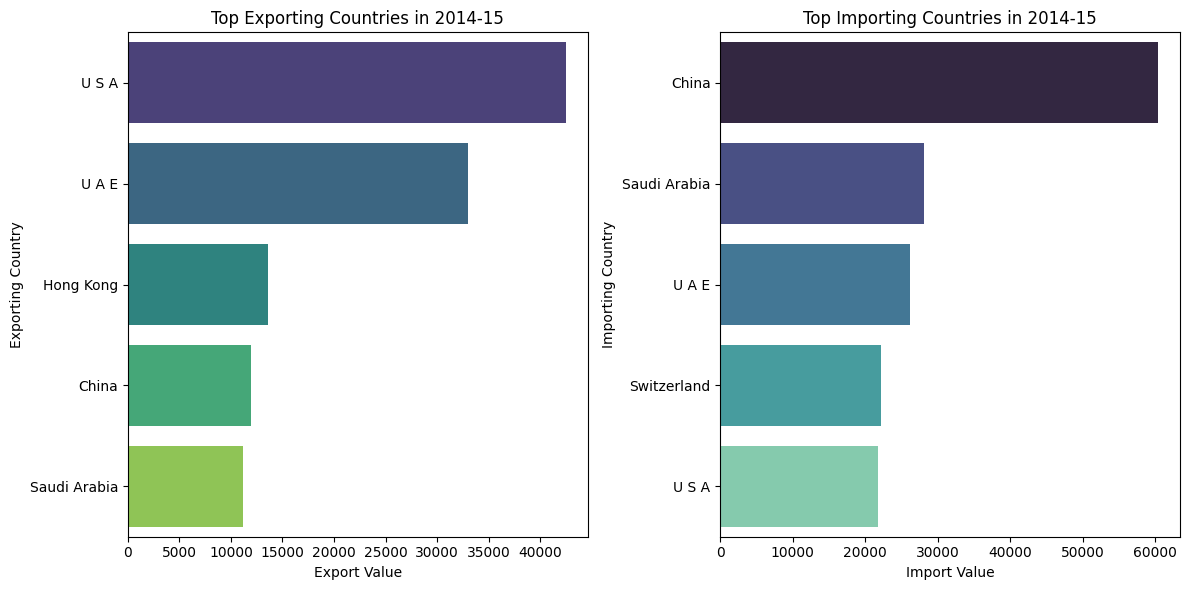

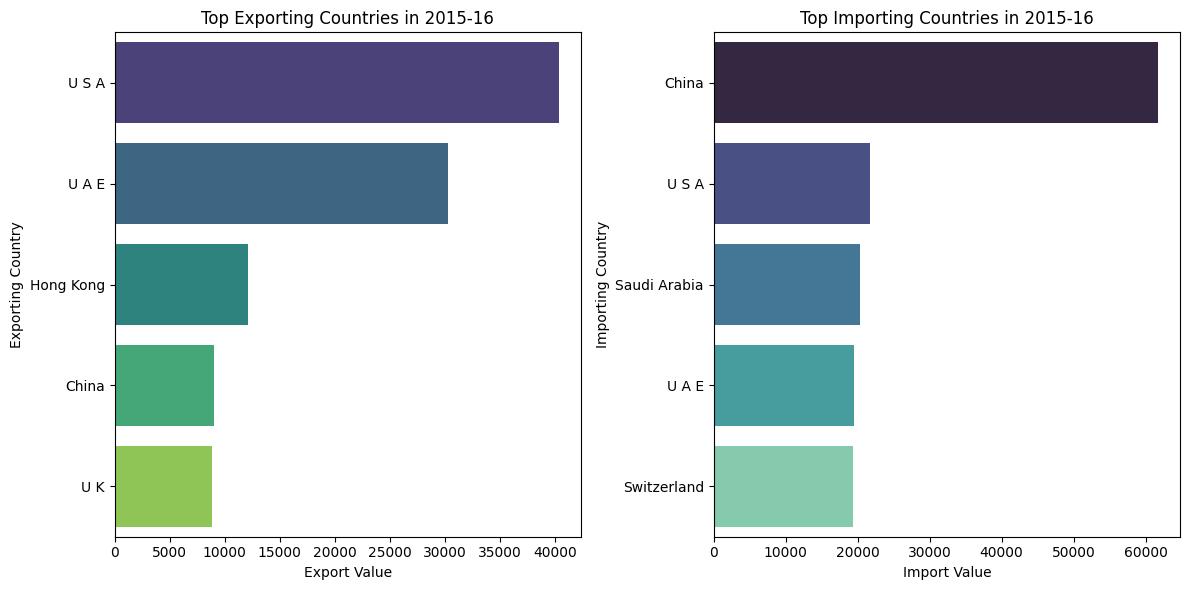

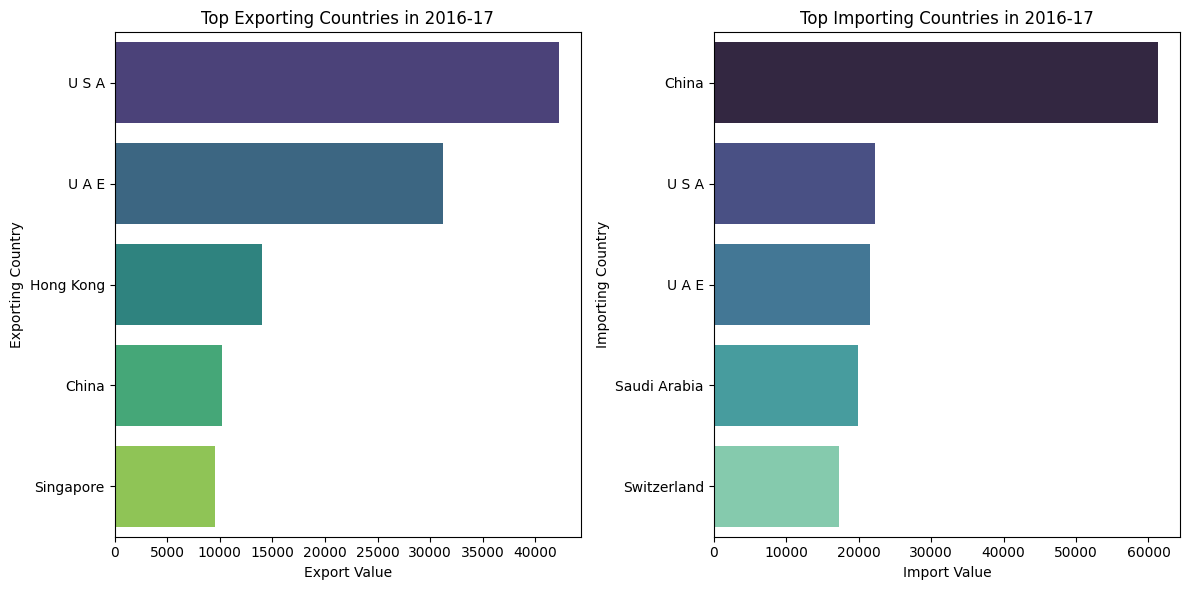

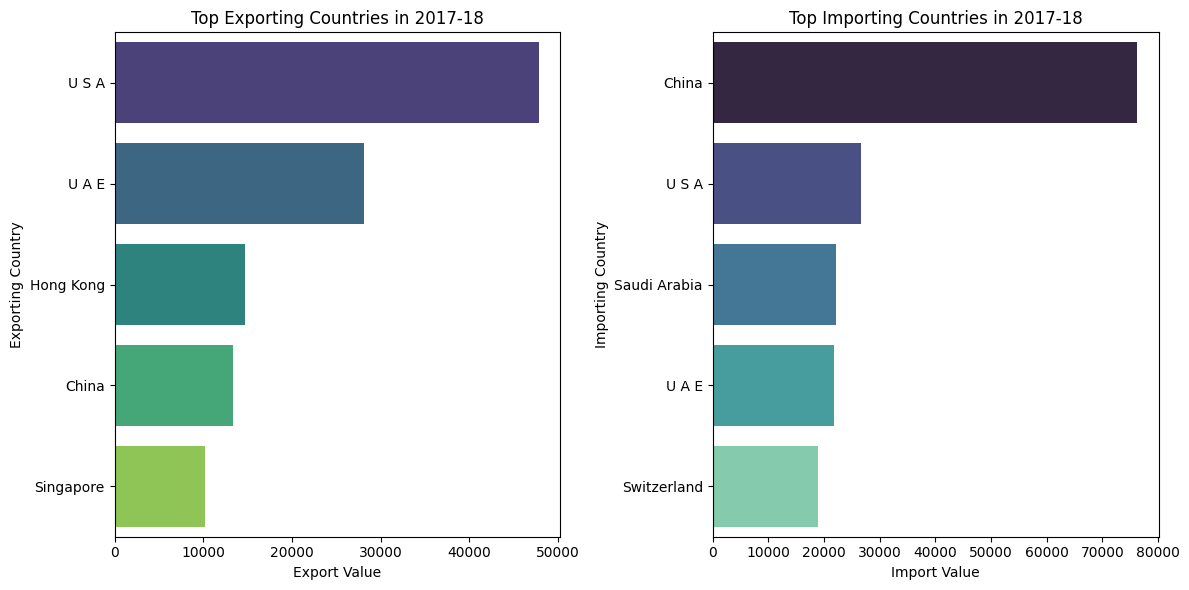

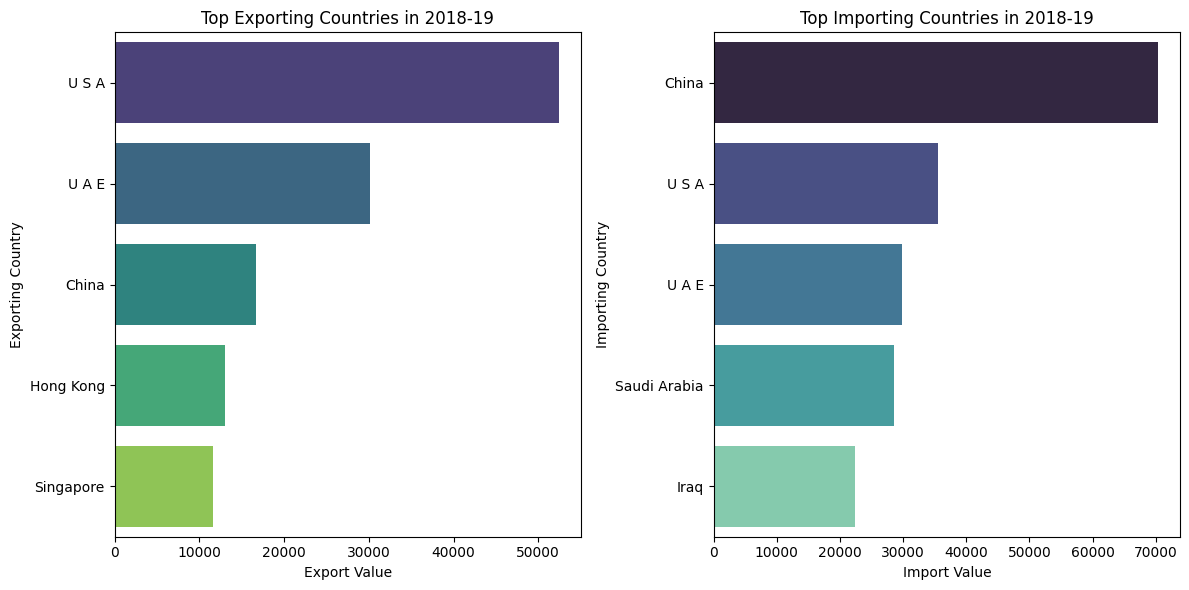

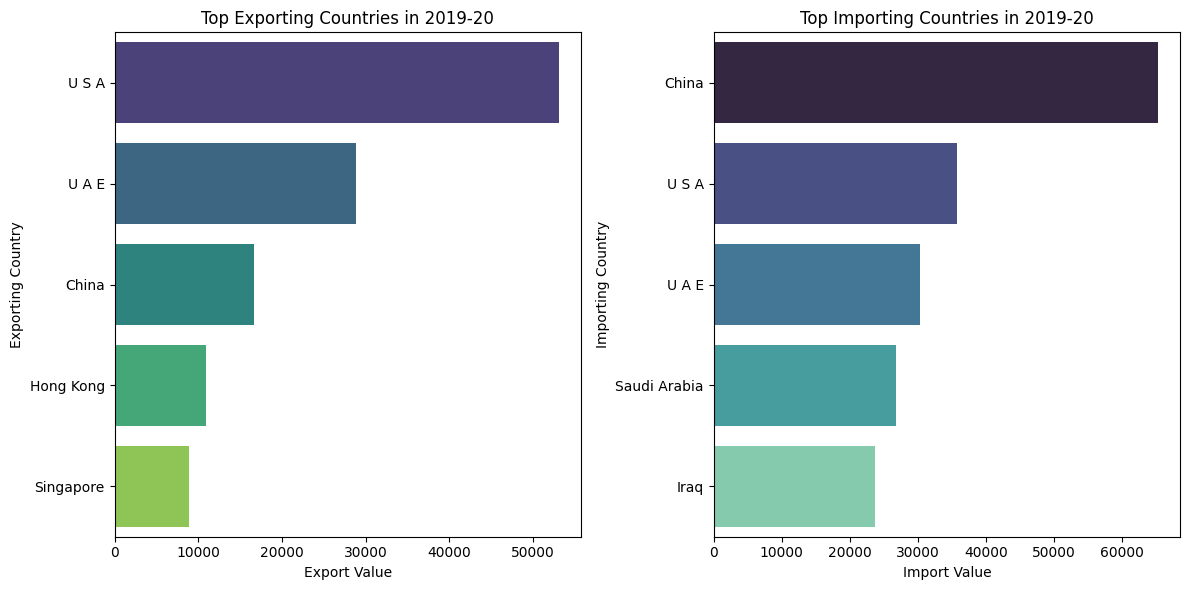

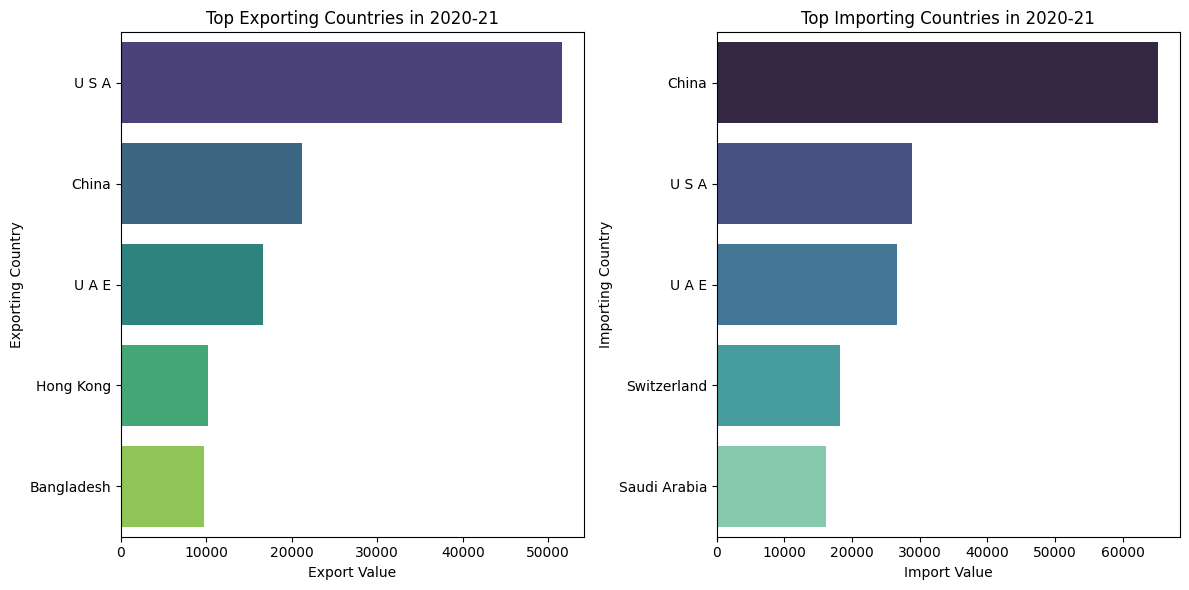

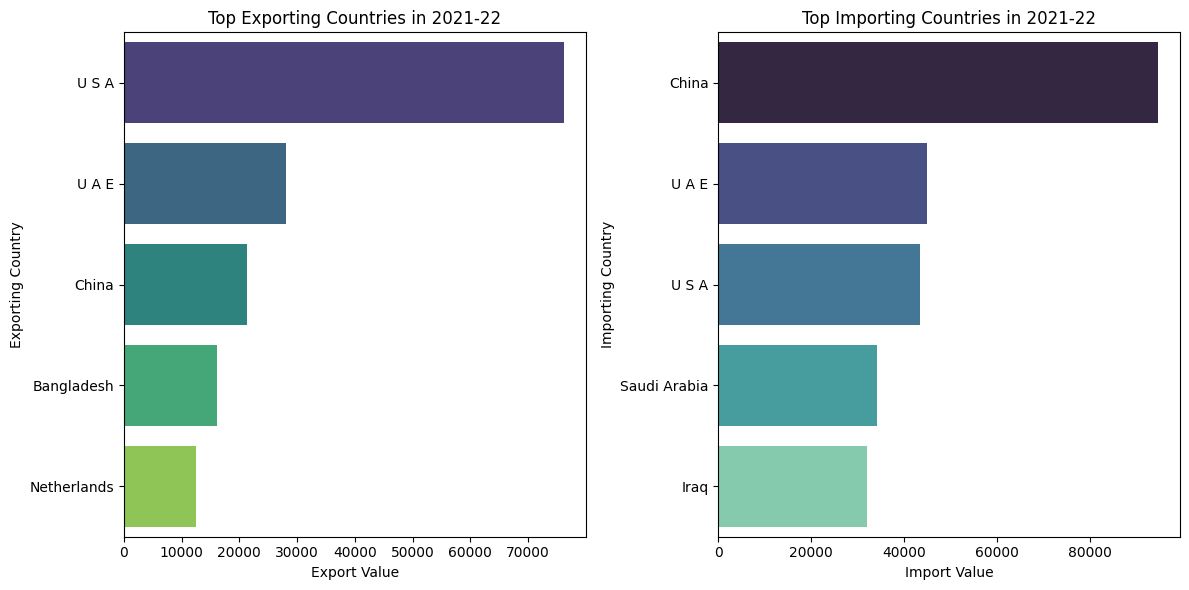

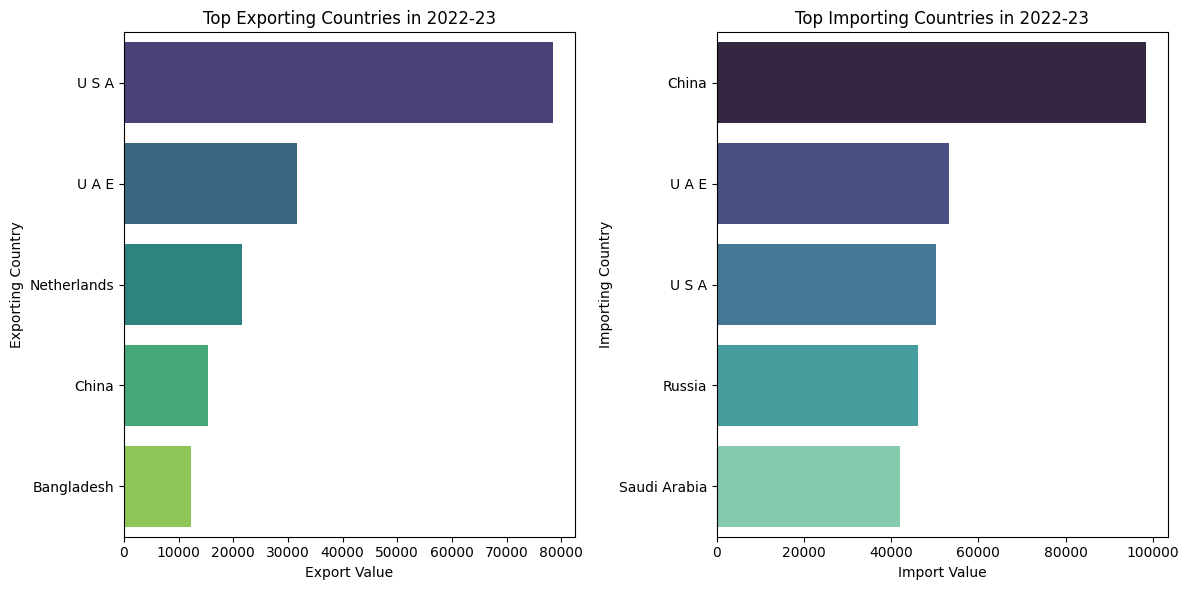

In [ ]:


# Visualization: Horizontal Bar Plot - Top Exporting Countries for Each Year
for year in result_df['Year'].unique():
    data_year = result_df[result_df['Year'] == year]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x='Export Value', y='Exporting Country', data=data_year, palette='viridis')
    plt.title(f'Top Exporting Countries in {year}')
    plt.xlabel('Export Value')
    plt.ylabel('Exporting Country')

    plt.subplot(1, 2, 2)
    sns.barplot(x='Import Value', y='Importing Country', data=data_year, palette='mako')
    plt.title(f'Top Importing Countries in {year}')
    plt.xlabel('Import Value')
    plt.ylabel('Importing Country')

    plt.tight_layout()
    plt.show()


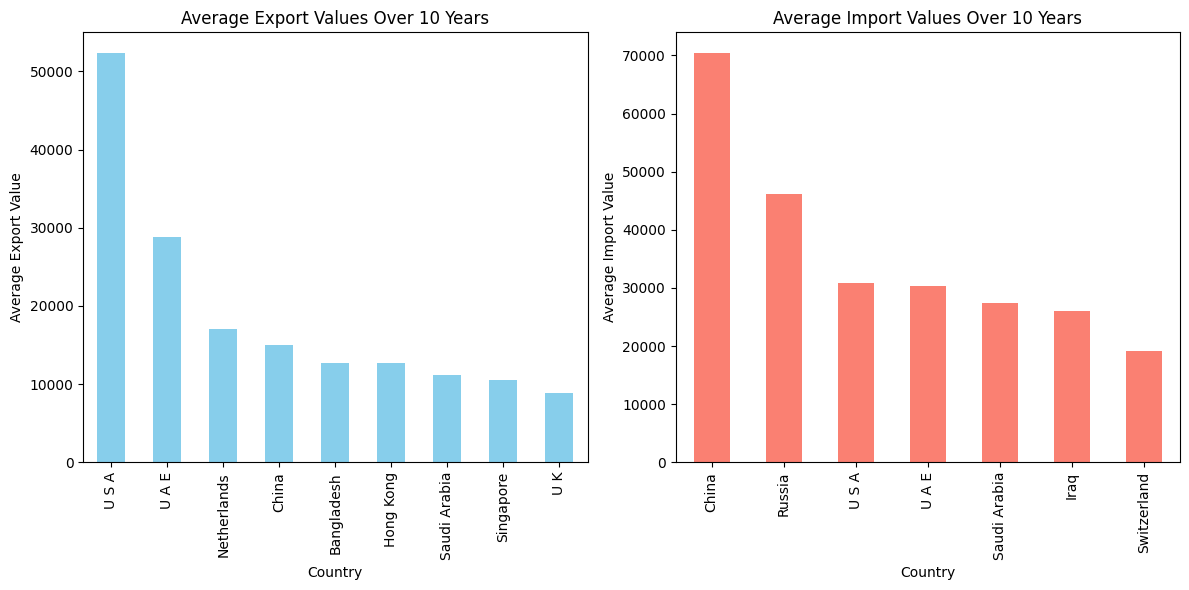

The most important export country is: U S A
The most important import country is: China


In [ ]:

# Average export and import values for each country
avg_export = df.groupby('Exp_country')['Exp_Val'].mean().sort_values(ascending=False)
avg_import = df.groupby('Imp_country')['Ipm_Val'].mean().sort_values(ascending=False)

# Most important country based on average values
most_important_export = avg_export.idxmax()
most_important_import = avg_import.idxmax()

# Visualization: Average Export and Import Values Over 10 Years
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
avg_export.plot(kind='bar', color='skyblue')
plt.title('Average Export Values Over 10 Years')
plt.xlabel('Country')
plt.ylabel('Average Export Value')

plt.subplot(1, 2, 2)
avg_import.plot(kind='bar', color='salmon')
plt.title('Average Import Values Over 10 Years')
plt.xlabel('Country')
plt.ylabel('Average Import Value')

plt.tight_layout()
plt.show()

# Printing the most important countries
print(f"The most important export country is: {most_important_export}")
print(f"The most important import country is: {most_important_import}")